# Airline Passenger Satisfaction

In [ ]:
# importing neccsary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV, VarianceThreshold, SelectPercentile, SelectKBest, SelectFpr, f_classif, RFE, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading the Data

In [ ]:
# Reading the training and testing datasets

train_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Airline Staisfaction Data/train.csv").drop("Unnamed: 0", axis = 1)
test_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Airline Staisfaction Data/test.csv").drop("Unnamed: 0", axis = 1)

df = pd.concat([train_df, test_df], ignore_index=True)

   <p style = "color:darkred; font-size:30px; font-style:bold"><strong>Data Exploration & Cleaning</strong></p>

In [ ]:
# Showing the shape of the dataset (rows, columns)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Showing the fist five rows af the training dataset
df.head()

The dataset has 129880 rows and 24 columns.


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Checking the number of null values in the dataset
print(f"Number of null values in the train data: \n{df.isna().sum()}")

Number of null values in the train data: 
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction   

- Our data is clean from null values except 'Arrival Delay in Minutes' column

In [ ]:
# Checking number of duplicated rows in the dataset
print(f"Number of duplicated Rows in the Data: {df.duplicated().sum()}")

Number of duplicated Rows in the Data: 0


In [ ]:
# Filling the null values in the 'Arrival Delay in Minutes' column with zeros
df.fillna(0, inplace = True)

# Dropping the 'id' column cause we won't use it.
df.drop("id", axis = 1, inplace = True)

### Clustering the age column into 4 categories

In [ ]:
# Define the age bins and labels for each group
bins = [0, 13, 30, 60, float('inf')]
labels = ['kids (0 - 13)', 'Youth (13 - 30)', 'Mid aged (30 - 60)', 'Old aged (60 <)']

# Create a new column "age_group"
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

df[["Age","Age_group"]].head()

,Age,Age_group
0,13,kids (0 - 13)
1,25,Youth (13 - 30)
2,26,Youth (13 - 30)
3,25,Youth (13 - 30)
4,61,Old aged (60 <)


### Calculating the Overall Rating For each customer

In [ ]:
satisfaction_columns = df.columns[6:-4]

# Calculate the overall rating
df['overall_rating'] = round(df[satisfaction_columns].mean(axis=1), 2)
df['overall_rating'].head()

0    3.86
1    2.29
2    3.71
3    3.00
4    3.50
Name: overall_rating, dtype: float64

In [ ]:
# Showing the main charactaristics of each column in the dataset
@interact(column = df.columns)
def column_info(column):
    print("*" * 10, column, "*" * 10)
    display(df[column].value_counts())
    print("-" * 30)
    display(df[column].describe())
    print("=" * 40)

interactive(children=(Dropdown(description='column', options=('Gender', 'Customer Type', 'Age', 'Type of Trave…

<p style = "color:darkred; font-size:30px; font-style:bold"><strong>Data Analysis</strong></p>

- We will use the training dataset in the analysis stage to gain information about the satisfaction of the passengers as it has the satisfaction rate in it

In [ ]:
@interact(column = df.select_dtypes("number").columns)
def plot_histogram(column):
    plt.figure(figsize=(12, 8))  # Set the figure size here
    sns.histplot(x = df[column], hue = df['satisfaction'], palette = "magma")
    plt.title(f'{column} Histogram')
    plt.show()

interactive(children=(Dropdown(description='column', options=('Age', 'Flight Distance', 'Inflight wifi service…

<p style = "color:darkblue; font-size:20px; font-style:bold">
    <strong>>>> What are the absolute satisfaction levels of our customers?</strong>
</p>

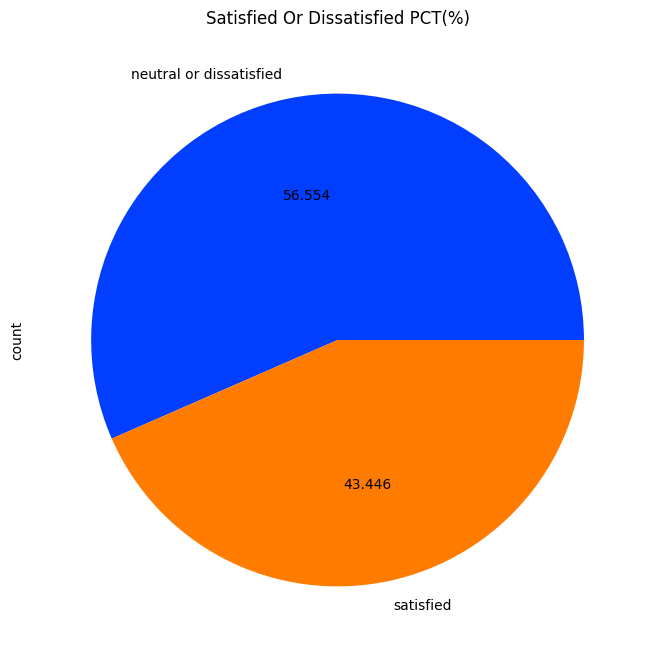

In [ ]:
df['satisfaction'].value_counts().plot.pie(figsize = (12, 8),
                                           title = "Satisfied Or Dissatisfied PCT(%)",
                                           colors = sns.color_palette("bright"),
                                           autopct = "%.3f");

- We need to analyze our data and see what are the reasons for this dissatisfaction !

<p style = "color:blue; font-size:20px; font-style:bold">
    <strong>>>> What are the satisfied age ranges in our customers ?</strong>
</p>

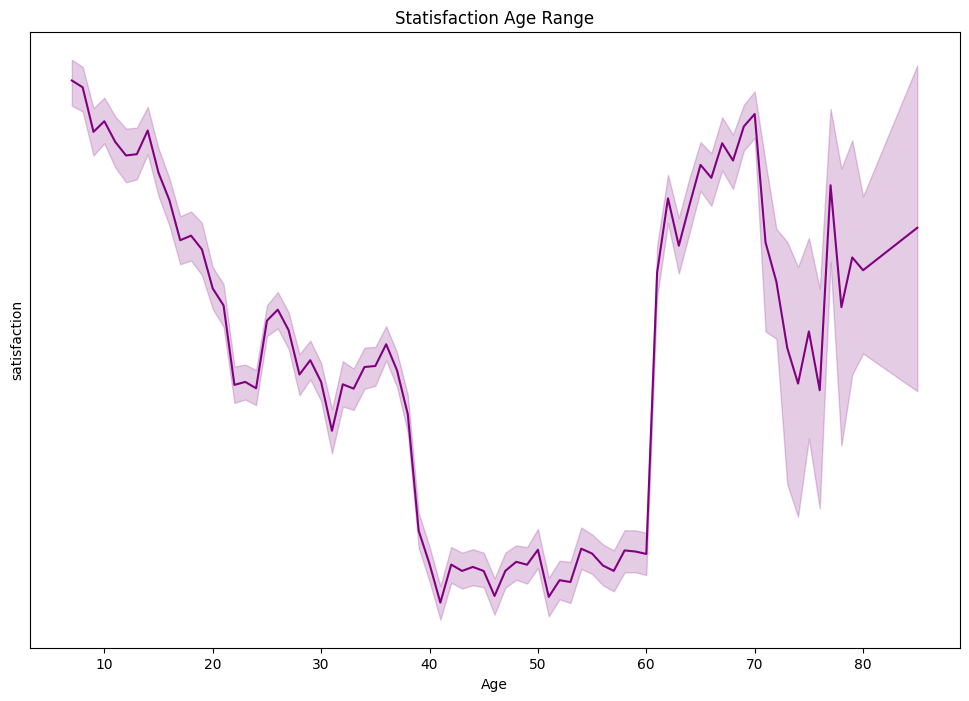

In [ ]:
plt.figure(figsize = (12, 8))
plt.title("Statisfaction Age Range")
sns.lineplot(x = 'Age', y = "satisfaction", data = df, color = "purple");

<Figure size 1000x600 with 0 Axes>

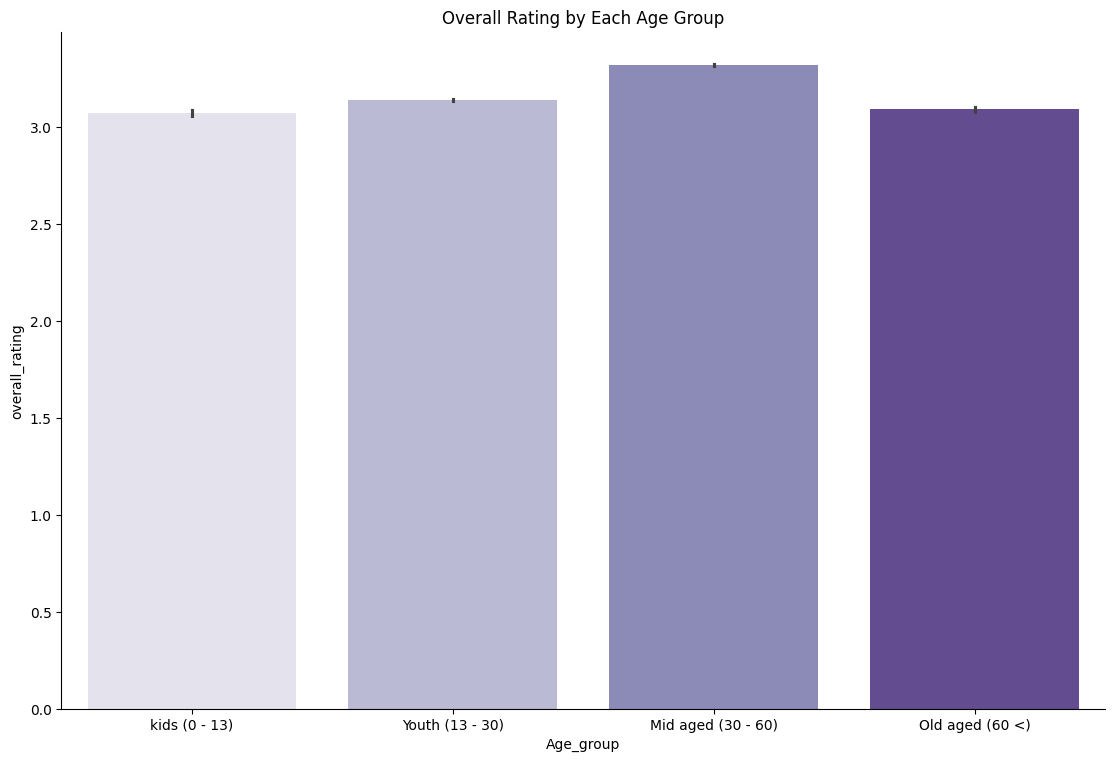

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

sns.catplot(x="Age_group", y="overall_rating", data=df, palette="Purples", kind="bar", height=7.5, aspect=1.5)

# Adding a title
plt.title("Overall Rating by Each Age Group")

# Show the plot
plt.show();

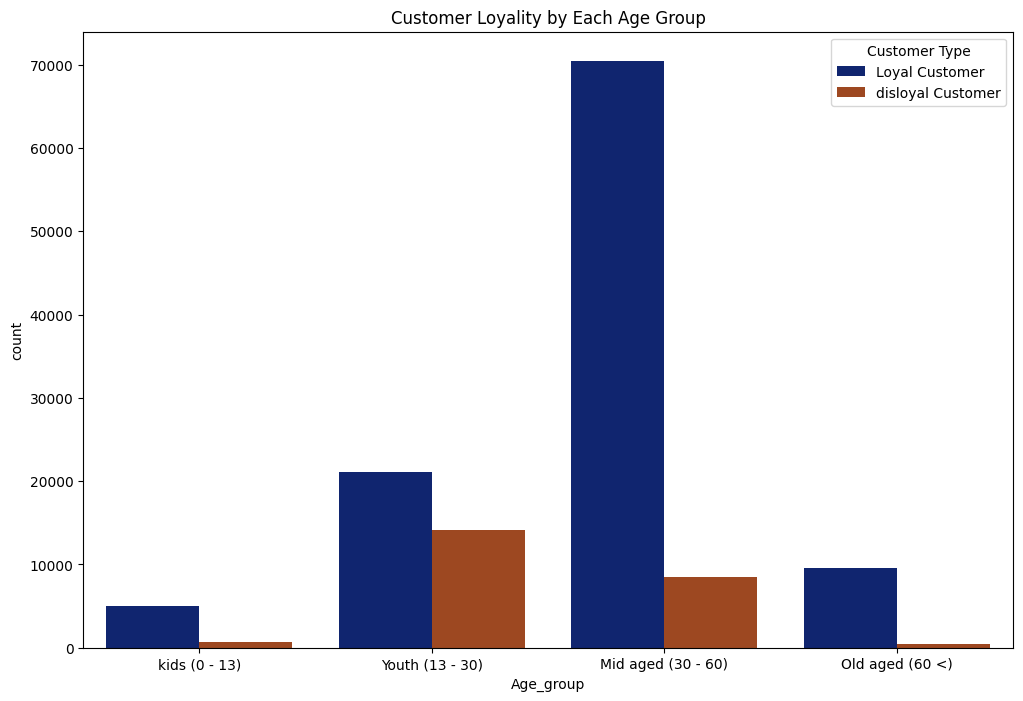

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

sns.countplot(x = "Age_group", hue = "Customer Type", data=df, palette="dark")

# Adding a title
plt.title("Customer Loyality by Each Age Group")

# Show the plot
plt.show();

<p style = "color:darkblue; font-size:20px; font-style:bold">
    <strong>>>> What is the satisfaction level of each class in the flight?</strong>
</p>

In [ ]:
# Getting the count of each combination of the satisfaction and the class columns
class_satisfaction = pd.crosstab(df["Class"], df['satisfaction'],
                                 values = df['satisfaction'], aggfunc = "count").sort_values("satisfied", ascending = False)
# Showing the Table
class_satisfaction

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,18994,43166
Eco,47366,10943
Eco Plus,7092,2319


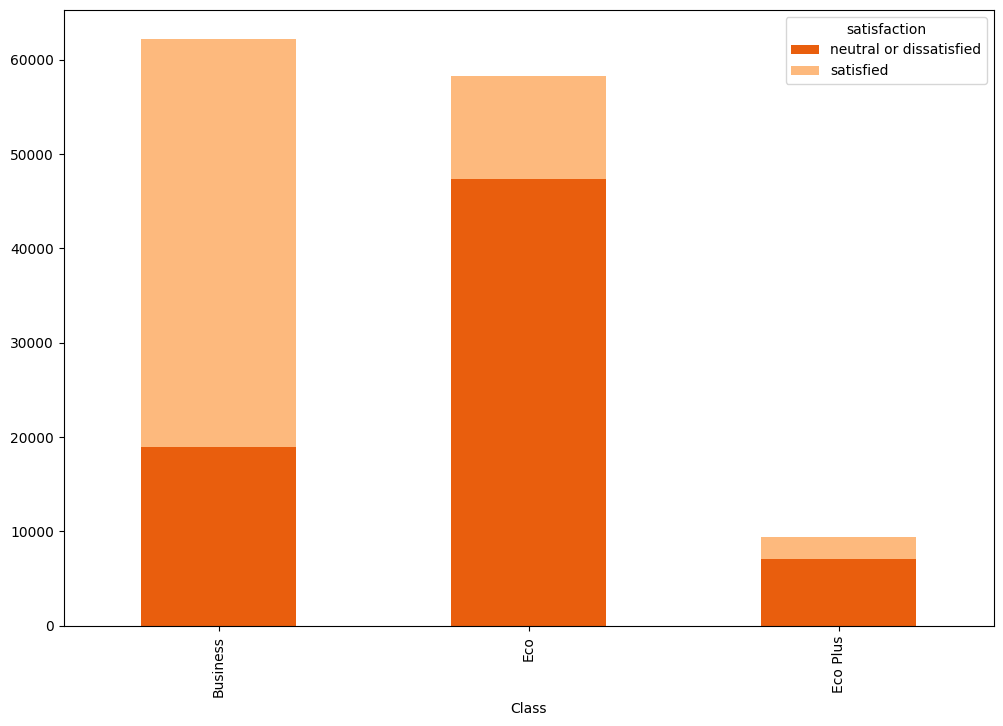

In [ ]:
# A bar chart to denote the
class_satisfaction.plot.bar(figsize = (12, 8), stacked=True,
                            color = sns.color_palette("Oranges_r", n_colors = len(class_satisfaction.columns)));

- We can see that the 'Business' class have the biggest satisfaction level between the three classes<br>
- And the least satisfaction level comes from the 'Eco Plus' class so we can conclude that it's not worthy to upgrade the class from 'Eco' to 'Eco Plus'

<p style = "color:darkblue; font-size:20px; font-style:bold">
    <strong>>>> Does loyal customer tend to get business or personal flights?</strong>
</p>

In [ ]:
flight_customer_type = pd.crosstab(df["Customer Type"], df['Type of Travel'],
                                                        values = df['overall_rating'], aggfunc = "sum")

flight_customer_type

Type of Travel,Business travel,Personal Travel
Customer Type,,
Loyal Customer,223699.64,124657.96
disloyal Customer,71990.25,627.80


- Our loyal customers tend to take our business services

<p style = "color:darkblue; font-size:20px; font-style:bold">
    <strong>>>> Are the passengers satisfied with the long distance flights or the short ones?</strong>
</p>

<Figure size 1000x600 with 0 Axes>

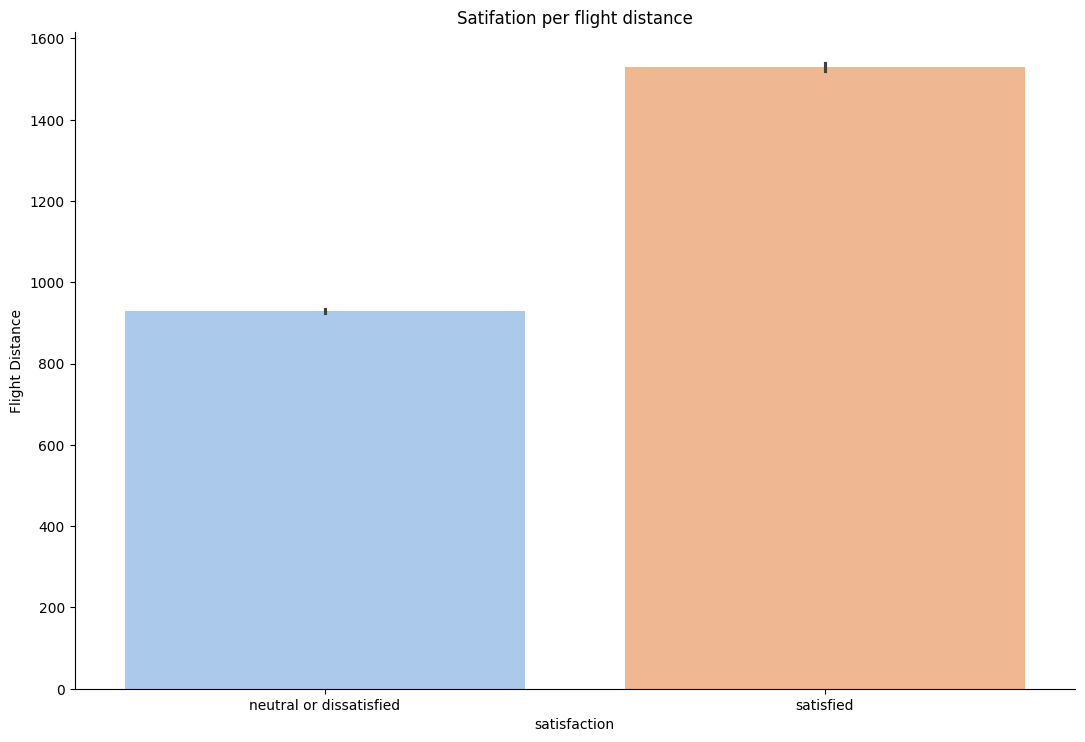

In [ ]:
# Set the figure size
plt.figure(figsize = (10, 6))

sns.catplot(x = "satisfaction", y = "Flight Distance", data = df, kind = "bar", palette = "pastel", height = 7.3, aspect = 1.5);

# Adding a title
plt.title("Satifation per flight distance")

# Show the plot
plt.show();

- Our passengers seems to be satisfied from the long distance flights more than the short distance flights especially in the business flights

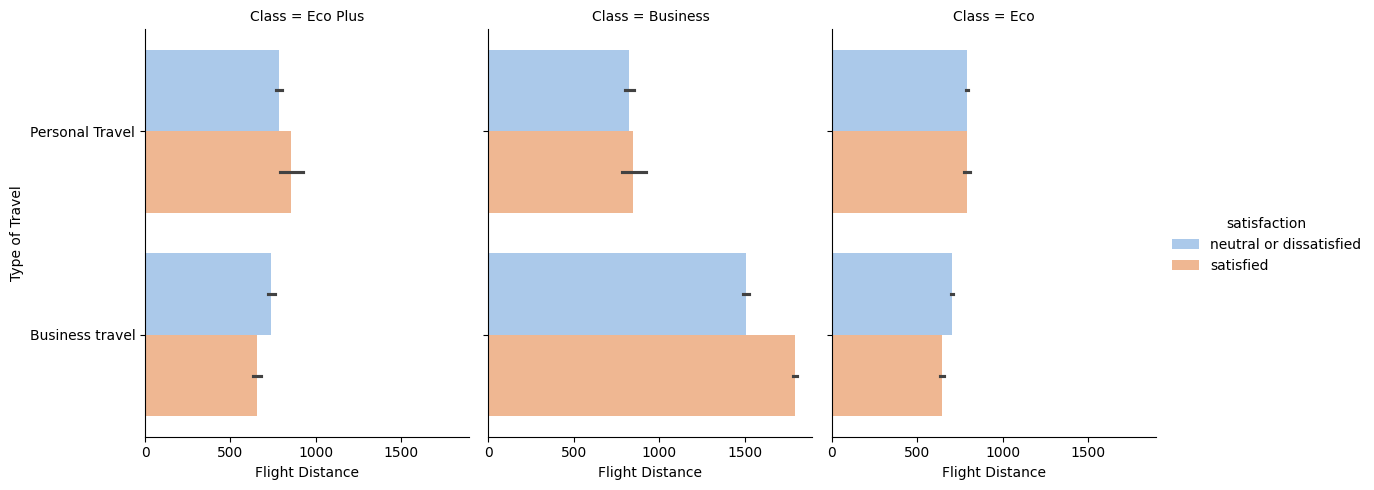

In [ ]:
sns.catplot(x = "Flight Distance", y = "Type of Travel", hue = "satisfaction", col="Class",
            data = df, kind = "bar", height = 5, aspect = 0.8, palette = "pastel");

- The business class seems to have the biggest satisfaction rate among our customers The flight distance in it are big and the business travel especially has the biggest numbers.

<p style = "color:darkblue; font-size:20px; font-style:bold">
    <strong>>>> What is the different satisfaction ration between the customers who faced a delay in their flight and the customers who didn't?</strong>
</p>

In [ ]:
# Satisfacton for Customers with delayed flights
delayed_flights = df[df['Departure Delay in Minutes'] != 0]
delayed_flights_satisfaction = delayed_flights.groupby("satisfaction")['Departure Delay in Minutes'].sum()
delayed_flights_satisfaction.to_frame()

,Departure Delay in Minutes
satisfaction,
neutral or dissatisfied,1205115
satisfied,705902


In [ ]:
# Satisfacton for Customers without delayed flights
undelayed_flights_satisfaction = df[df['Departure Delay in Minutes'] == 0]['satisfaction'].value_counts()

# Showing the count of satisfied vs unsatisfaied customers for the undelayed flights
undelayed_flights_satisfaction.to_frame()

,count
satisfaction,
neutral or dissatisfied,39657
satisfied,33699


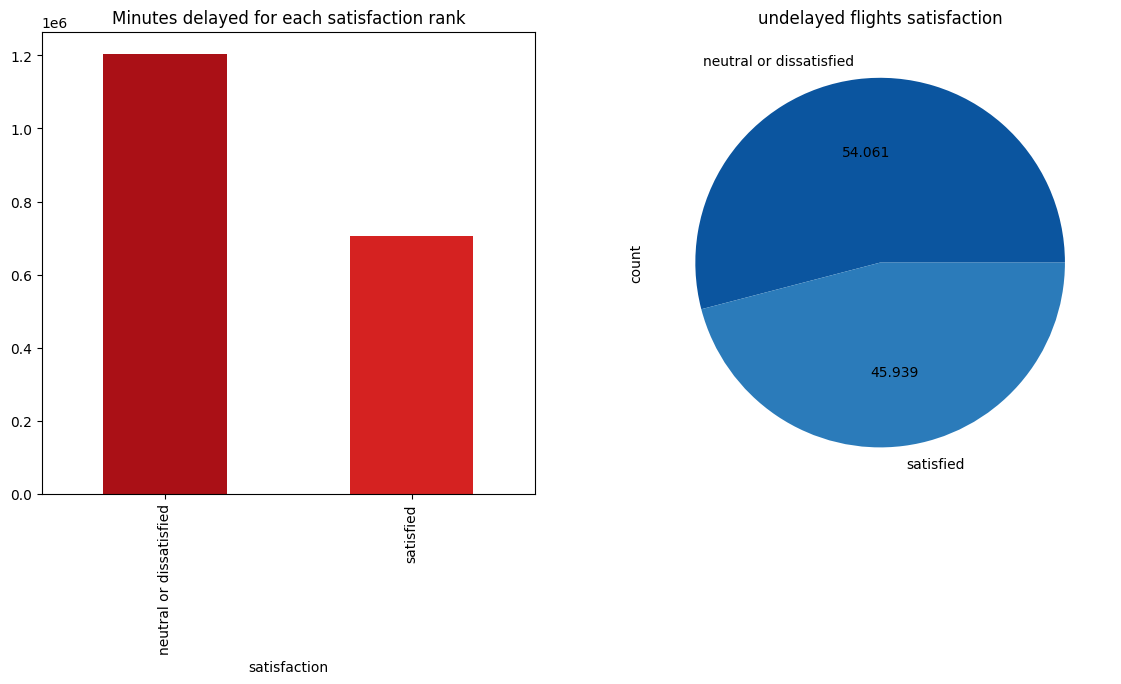

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

delayed_flights_satisfaction.plot.bar(title = "Minutes delayed for each satisfaction rank", ax = ax[0], color = sns.color_palette("Reds_r"))
undelayed_flights_satisfaction.plot.pie(title = "undelayed flights satisfaction",
                                        ax = ax[1], colors = sns.color_palette("Blues_r"), autopct = '%.3f');

- The total minutes delayed minutes for dissatisfied customers are by far higher than the minutes for satisfied customers.
- We can see that the customers with undelayed flights had a better satisfaction ratio than the customers with the delayed flights.

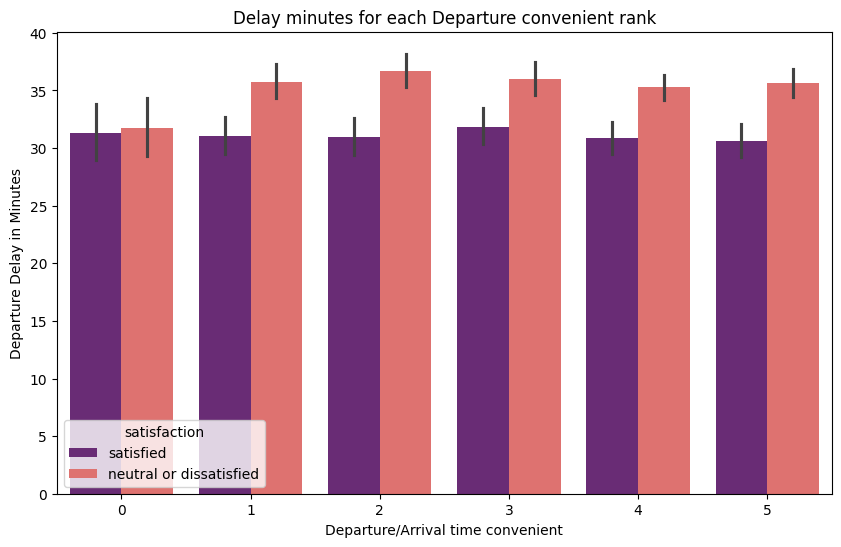

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Departure/Arrival time convenient', y = "Departure Delay in Minutes",
            data = delayed_flights, hue = "satisfaction", palette = "magma");

plt.title("Delay minutes for each Departure convenient rank")
plt.show()

<p style = "color:darkred; font-size:30px; font-style:bold"><strong>ML Classification Model</strong></p>

### Train and test date cleaning

In [ ]:
train_df.fillna(0, inplace = True)
test_df.fillna(0, inplace = True)

train_df.drop("id", axis = 1, inplace = True)
test_df.drop("id", axis = 1, inplace = True)

### Encoding the categorical columns

In [ ]:
# Instantiate LabelEncoder
enc = LabelEncoder()

# Encoding the categorical features in the training and test data
for column in train_df.select_dtypes("O").columns:
    train_df[f'{column}_enc'] = enc.fit_transform(train_df[column])
    train_df.drop(column, axis = 1, inplace = True)

for column in test_df.select_dtypes("O").columns:
    test_df[f'{column}_enc'] = enc.fit_transform(test_df[column])
    test_df.drop(column, axis = 1, inplace = True)

train_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_enc,Customer Type_enc,Type of Travel_enc,Class_enc,satisfaction_enc
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,18.0,1,0,1,2,0
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,6.0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,0.0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,9.0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,0.0,1,0,0,0,1


### Constructing the training matrix and target vector  

In [ ]:
X_train = train_df.drop("satisfaction_enc", axis = 1)
y_train = train_df['satisfaction_enc']

X_test = test_df.drop("satisfaction_enc", axis = 1)
y_test = test_df['satisfaction_enc']

### Standarizing the data
- For it to have Equal ranges

In [ ]:
# Inistantiating the scaler object
scaler = StandardScaler()

# Fitting the scaler to the data and transforming it.
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = train_df.columns[:-1])
X_test = pd.DataFrame(scaler.transform(X_test), columns = test_df.columns[:-1])

X_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_enc,Customer Type_enc,Type of Travel_enc,Class_enc
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169,1.015031,-0.472767,1.490614,2.264618
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313,1.015031,2.115208,-0.670865,-0.957054
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554,-0.985192,-0.472767,-0.670865,-0.957054
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.158692,-0.985192,-0.472767,-0.670865,-0.957054
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554,1.015031,-0.472767,-0.670865,-0.957054


### LogisticRegression & RFE

In [ ]:
# Instantiating the Logistic Regression model
logreg = LogisticRegression()

# Create an RFE selector with the logistic regression model
num_features_to_select = 11  # Choose the number of features to select
rfe_selector = RFE(logreg, n_features_to_select = num_features_to_select)

# Fit the RFE selector on the training data
X_train_selected = rfe_selector.fit_transform(X_train, y_train)

# Use the selected features to transform the test data
X_test_selected = rfe_selector.transform(X_test)

# Get the names of the selected columns
selected_columns = X_train.columns[rfe_selector.get_support()]

# Print the selected columns
print("Selected Columns:", list(selected_columns))

# Train a logistic regression model on the selected features
logreg.fit(X_train_selected, y_train)

Selected Columns: ['Inflight wifi service', 'Ease of Online booking', 'Online boarding', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Customer Type_enc', 'Type of Travel_enc', 'Class_enc']


LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = logreg.predict(X_test_selected)

## Evaluating the combination model ##

# Accuracy
accuracy_train = accuracy_score(y_train, logreg.predict(X_train_selected))
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy:")
print("\tTraining -> ", round(accuracy_train, 4), end = "\t")
print("\tTesting -> ", accuracy_test.round(4))
# Precision
print("Precision:")
print("\tTraining -> ", precision_score(y_train, logreg.predict(X_train_selected)).round(4), end = "\t")
print("\tTesting -> ", precision_score(y_test, y_pred).round(4))
# Recall
print("Recall:")
print("\tTraining -> ", recall_score(y_train, logreg.predict(X_train_selected)).round(4), end = "\t")
print("\tTesting -> ", recall_score(y_test, y_pred).round(4))

Accuracy:
	Training ->  0.8727		Testing ->  0.868
Precision:
	Training ->  0.8672		Testing ->  0.8638
Recall:
	Training ->  0.834		Testing ->  0.83


## KNN & KBest

In [ ]:
# Define the KNN classifier model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Feature selection
k_best_selector = SelectKBest(score_func = mutual_info_classif, k = num_features_to_select)

# Fitting and transforming the feature matrix
X_train_selected = k_best_selector.fit_transform(X_train, y_train)
X_test_selected = k_best_selector.transform(X_test)

# Training the KNN model on the selected features
knn_model.fit(X_train_selected, y_train)

# Predicting the target on the Test features
y_pred = knn_model.predict(X_test_selected)

# Get the index of the selected features
selected_feature_indices = k_best_selector.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices]
print("Selected Features:", list(selected_features))

Selected Features: ['Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Cleanliness', 'Type of Travel_enc', 'Class_enc']


In [ ]:
## Evaluating the combination model ##

# Accuracy
accuracy_train = accuracy_score(y_train, knn_model.predict(X_train_selected))
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy:")
print("\tTraining -> ", round(accuracy_train, 4), end = "\t")
print("\tTesting -> ", accuracy_test.round(4))

# Precision
print("Precision:")
print("\tTraining -> ", precision_score(y_train, knn_model.predict(X_train_selected)).round(4), end = "\t")
print("\tTesting -> ", precision_score(y_test, y_pred).round(4))

# Recall
print("Recall:")
print("\tTraining -> ", recall_score(y_train, knn_model.predict(X_train_selected)).round(4), end = "\t")
print("\tTesting -> ", recall_score(y_test, y_pred).round(4))

Accuracy:
	Training ->  0.9487		Testing ->  0.9316
Precision:
	Training ->  0.955		Testing ->  0.9373
Recall:
	Training ->  0.9252		Testing ->  0.9048


### RandomForestClassifier & SelectPercentile

In [ ]:
# Intstantiating the 'SelectPercentile' selector object
selector = SelectPercentile(score_func = f_classif, percentile = 60)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Inistansiate the rf classifier object
rf_model = RandomForestClassifier()

# Get the names of the selected columns
selected_columns = X_train.columns[selector.get_support()]

# Show the selected columns
print("Selected Columns:", list(selected_columns))

# Fitting the model to the selected training data
rf_model.fit(X_train_selected, y_train)

Selected Columns: ['Flight Distance', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Type of Travel_enc', 'Class_enc']


RandomForestClassifier()

In [ ]:
## Evaluating the combination model ##

y_pred = rf_model.predict(X_test_selected)

# Accuracy
accuracy_train = accuracy_score(y_train, rf_model.predict(X_train_selected))
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy:")
print("\tTraining -> ", accuracy_train, end = "\t")
print("\tTesting -> ", accuracy_test.round(4))

# Precision
print("Precision:")
print("\tTraining -> ", precision_score(y_train, rf_model.predict(X_train_selected)), end = "\t")
print("\tTesting -> ", precision_score(y_test, y_pred).round(4))

# Recall
print("Recall:")
print("\tTraining -> ", recall_score(y_train, rf_model.predict(X_train_selected)), end = "\t")
print("\tTesting -> ", recall_score(y_test, y_pred).round(4))

Accuracy:
	Training ->  0.999951878657222		Testing ->  0.9515
Precision:
	Training ->  0.999955579246624		Testing ->  0.9587
Recall:
	Training ->  0.9999333703498057		Testing ->  0.9296


True Positives (TP): 10600
False Positives (FP): 457
True Negatives (TN): 14116
False Negatives (FN): 803


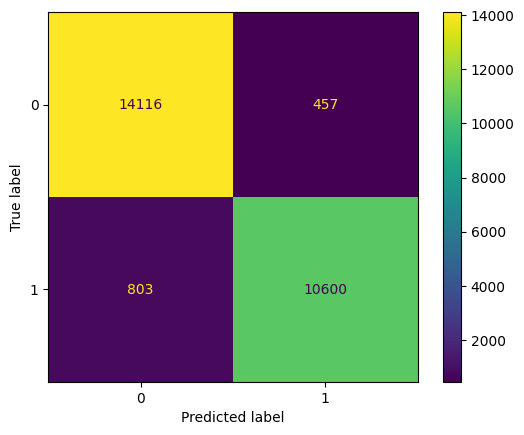

In [ ]:
# Constructing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating the confusion matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()


# Extracting TP, FP, TN, FN
TP = cm[1, 1]  # True Positive
FP = cm[0, 1]  # False Positive
TN = cm[0, 0]  # True Negative
FN = cm[1, 0]  # False Negative

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")